a: 41.9530941252263
b: 1.422612311311599e-18


8.800000000000001e-19

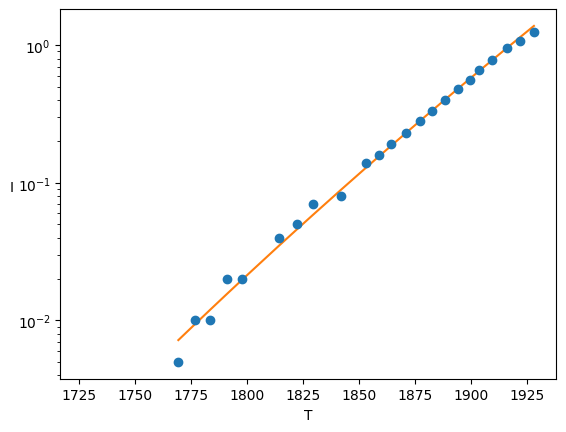

In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

data['T_mean'] = (data['T_max'] + data['T_min']) / 2 + 273
# data['T_error'] = data['T_max'] - data['T_mean']

# I!=0のデータの抽出
data_without_zero = data[data['I']!=0]
from scipy.optimize import curve_fit

def linear(x,a,b):
    return  a + 2 *np.log(x) - b/x 


popt, pcov = curve_fit(linear,data_without_zero['T_mean'],np.log(data_without_zero['I']),p0=[10,10],maxfev=10000)  



fig,ax = plt.subplots()
# エラーバーをつけたグラフを記述する
# ax.errorbar(data['T_mean'],data['I'],xerr=data['T_error'],fmt='o',capsize=5)
ax.errorbar(data['T_mean'],data['I'],fmt='o',capsize=5)
# fitting結果のプロット
ax.plot(data_without_zero['T_mean'],np.exp(linear(data_without_zero['T_mean'],*popt)),label='fitting')
ax.set_xlabel('T')
# 縦書きにする
ax.set_ylabel('I',rotation=0)
ax.set_yscale('log')

print('a:',popt[0])
print('b:',popt[1]* 1.3 * 10**(-23))
5.5 * 1.6 * 10**(-19)